<a href="https://colab.research.google.com/github/thiruragu/SHALA_2020/blob/master/DS_L2_17_Apr_Assignment_2_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Assignment - 2: Basic Data Understanding**

---

This assignment will get you familiarized with Python libraries and  functions required for data visualization.

---
## Part 1 - Loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

In [0]:
# Load the four libraries with their aliases 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```df``` and ```movies``` respectively. 
* Print the first ten rows of ```df```. 



In [0]:
# Load the file as a dataframe
df = pd.read_csv('train.csv')
movies = pd.read_csv('moviesData.csv')

In [0]:
# Print the first ten rows of df
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


### Using the dataframe ```df```, perform the following: 

* Print the first five rows of the column ```MonthlyRate```. 
* Find out the details of the column ```MonthlyRate``` like mean, maximum value, minimum value, etc. 

In [0]:
# Print the first five rows of MonthlyRate
df['MonthlyRate'].head(5)

0    19479
1    24907
2     2396
3    23159
4    16632
Name: MonthlyRate, dtype: int64

In [0]:
# Find the details of MonthlyRate 
df['MonthlyRate'].describe()

count     1028.000000
mean     14243.531128
std       7048.768076
min       2094.000000
25%       8259.750000
50%      14074.500000
75%      20342.250000
max      26999.000000
Name: MonthlyRate, dtype: float64

---
## Part 2 - Cleaning and manipulating data 
---

### Using the dataframe ```df```, peform the following:

* Check whether there are any missing values in ```df```. 
* If yes, drop those values and print the size of ```df``` after dropping these. 

In [0]:
# Check for missing values 
print(df.isna().sum())

# Drop the missing values 
if df.isna().any().sum() == 0:
  print("\nNo missing values found in train data\n")
else:
  df = df.dropna()

# Print the size of df after dropping 
print("Size of df =", df.shape)


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
ID        

### Using the dataframe ```df```, peform the following:

* Add another column named ```MonthRateNew``` in ```df``` by subtracting the mean from ```MonthlyRate``` and dividing it by standard deviation. 

In [0]:
# Add a column named MonthRateNew 
df['MonthRateNew'] = ( df['MonthlyRate'] - df['MonthlyRate'].mean() ) / df['MonthlyRate'].std()

### Using the dataframe ```movies```, perform the following: 

* Check whether there are any missing values in ```movies```. 
* Find out the number of observations/rows having any of their features/columns missing. 
* Drop the missing values and print the size of ```movies``` after dropping these. 
* Instead of dropping the missing values, replace the missing values by their mean (or some suitable value). 


In [0]:
# Check for missing values 
print("Size of movies =",movies.shape,"\n")
print(movies.isna().sum())

# Drop the missing values
# if movies.isna().any().sum() == 0:
#   print("\nNo Missing values found!")
# else:
#   movies = movies.dropna()
#   print("Size of movies after dropping =",movies.shape,"\n")


# Replace the missing values 
# You can use SimpleImputer of sklearn for this
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
movies['runtime'] = imp_mean.fit_transform(movies[['runtime']]).ravel


Size of movies = (600, 31) 

Unnamed: 0           0
title                0
title_type           0
genre                0
runtime              1
mpaa_rating          0
studio               5
thtr_rel_year        0
thtr_rel_month       0
thtr_rel_day         0
dvd_rel_year         7
dvd_rel_month        7
dvd_rel_day          7
imdb_rating          0
imdb_num_votes       0
critics_rating       0
critics_score        0
audience_rating      0
audience_score       0
best_pic_nom         0
best_pic_win         0
best_actor_win       0
best_actress_win     0
best_dir_win         0
top200_box           0
director             2
actor1               2
actor2               7
actor3               9
actor4              12
actor5              14
dtype: int64


---
## Part 3 - Visualizing data 
---

### Visualize the ```df``` by drawing the following plots:

* Plot a histogram of ```Age``` and find the range in which most people are there. 
* Modify the histogram of ```Age``` by adding 30 bins. 
* Draw a scatter plot between ```Age``` and ```Attrition``` and suitable labels to the axes. Find out whether people more than 50 years are more likely to leave the company. (```Attrition``` = 1 means people have left the company). 

The Age range in which most people are there is between 30.0 and 43.0

 12.07 % chances that people more than 50 years are more likely to leave the company



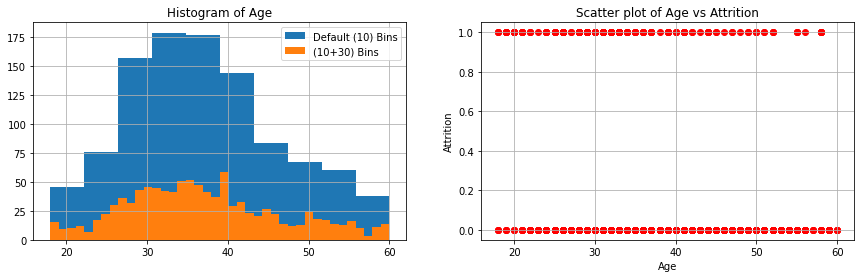

In [0]:
# Plot and modify the histogram of 

plt.subplot(1,2,1)
df['Age'].hist(label="Default (10) Bins")
df['Age'].hist(bins=40, label="(10+30) Bins")
plt.title("Histogram of Age")
plt.legend()

# Draw a scatter plot between Age and Attrition
plt.subplot(1,2,2)
plt.scatter(df['Age'], df['Attrition'], c='r')
plt.grid()
plt.xlabel("Age")
plt.ylabel("Attrition")
plt.title("Scatter plot of Age vs Attrition")

plt.subplots_adjust(left=0.1,right=2)

Q1 = df['Age'].quantile(q=0.25)
Q3 = df['Age'].quantile(q=0.75)
print("The Age range in which most people are there is between", Q1,"and", Q3)


# Probaility of persons leaving
age_above_50 = df['Attrition'][df['Age']>50].value_counts()
prob = age_above_50[1] / age_above_50.sum() * 100
print("\n",prob.round(2),"% chances that people more than 50 years are more likely to leave the company\n")

### Visualize the ```df``` by following the steps given below:

* Get a series containing counts of unique values of ```Attrition```.
* Draw a countplot for ```Attrition``` using ```sns.countplot()```. 

0    856
1    172
Name: Attrition, dtype: int64 



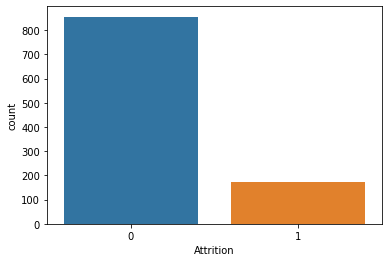

In [0]:
# Get a series of counts of values of Attrition
print(df['Attrition'].value_counts(),"\n")

# Draw a countplot for Attrition 
# You may use countplot of seaborn for this 

sns.countplot(df['Attrition'])


### Visualize the ```df``` by following the steps given below:

* Draw a cross tabulation of ```Attrition``` and ```BusinessTravel``` as bar charts. Find which value of ```BusinessTravel``` has highest number of people.

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
0                       92                150            614
1                       10                 47            115

The value of Travel_Rarely has highest no. of people 



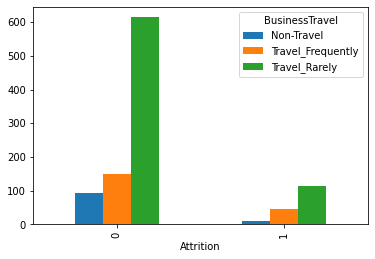

In [0]:
# Draw a cross tab of Attritiona and BusinessTravel 
# You may use crosstab of pandas for this 
ct1 = pd.crosstab(df['Attrition'], df['BusinessTravel'])
print(ct1)
ct1.plot.bar()
ct_1 = ct1.sum()
ct1_index = ct_1.index.tolist()
print("\nThe value of",ct1_index[ct_1.argmax()],"has highest no. of people","\n")

### Visualize the ```df``` by drawing the following plot:

* Draw a stacked bar chart between ```Attrition``` and ```Gender``` columns. 

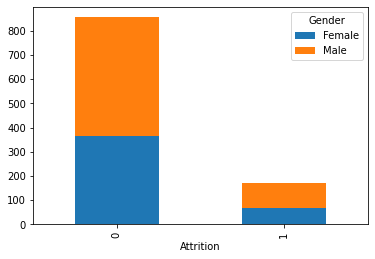

In [0]:
# Draw a stacked bar chart between Attrition and Gender 
# df.plot.bar('Age', 'Attrition', stacked=True)
ct2 = pd.crosstab(df['Attrition'], df['Gender'])
# print(ct2)
ct2.plot.bar(stacked=True)

### Visualize the ```df``` by drawing the following histogram:

* Draw a histogram of ```TotalWorkingYears``` with 30 bins. 
* Draw a histogram of ```YearsAtCompany``` with 30 bins and find whether the values in ```YearsAtCompany``` are skewed. 

Skew details of Years at Company:-
	+ve Skew (Skewed Right) = 1.772


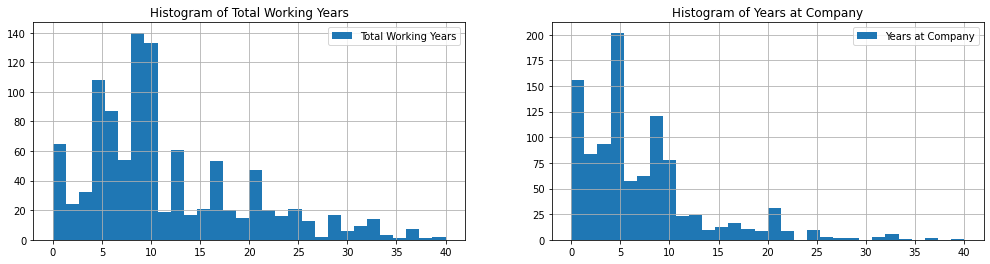

In [0]:
# Draw a histogram of TotalWorkingYears with 30 bins
plt.subplot(1,2,1)
df['TotalWorkingYears'].hist(bins=30, label="Total Working Years")
plt.title("Histogram of Total Working Years")
plt.legend()

# Draw a histogram of YearsAtCompany
plt.subplot(1,2,2)
df['YearsAtCompany'].hist(bins=30, label="Years at Company")
plt.title("Histogram of Years at Company")
plt.legend()

plt.subplots_adjust(left=0,right=2.2)

skew_YAC = df['YearsAtCompany'].skew().round(3)
print("Skew details of Years at Company:-")
if skew_YAC == 0:
  print("\tNormal Distribution (Not Skewed)")
elif skew_YAC > 0:
    print("\t+ve Skew (Skewed Right) =", skew_YAC)
else:
    print("\t-ve Skew (Skewed Left) =", skew_YAC)

### Visualize the ```df``` by drawing the following boxplot:

* Draw a boxplot of ```MonthlyIncome``` for each ```Department``` and report whether there is/are outlier(s). 


Outliers present in Sales
Outliers present in Research & Development
No Outliers present in Human Resources


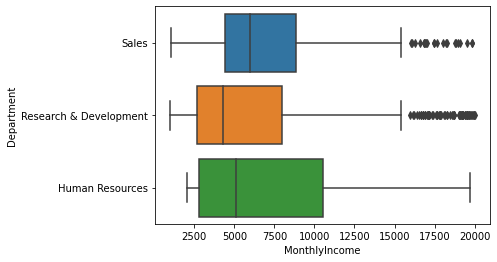

In [0]:
# Draw a boxplot of MonthlyIncome for each Department and report outliers 
sns.boxplot(x=df['MonthlyIncome'], y=df['Department'])

group = df.groupby('Department')
df_temp = group.apply(lambda x: x['MonthlyIncome'].unique())

# Check for outliers
for i in df['Department'].unique():
  temp = df_temp[i]
  q_1 = np.percentile(temp, 25)
  q_3 = np.percentile(temp, 75)
  IQR = q_3 - q_1
  lower_bound = q_1 - (1.5 * IQR)
  upper_bound = q_3 + (1.5 * IQR)
  if temp.min() < lower_bound or temp.max() > upper_bound:
    print("Outliers present in", i)
  else:
    print("No Outliers present in", i)

### Visualize the ```df``` by drawing the following piechart:

* Create a pie chart of the values in ```JobRole``` with suitable label and report which role has highest number of persons. 

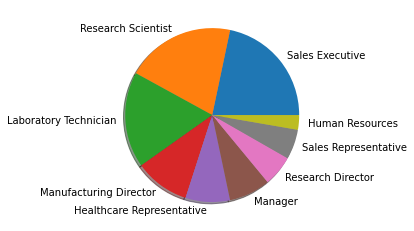

Sales Executive has the highest no. of persons


In [0]:
# Create a piechart of JobRole 
# You will need to find the counts of unique values in JobRole. 
jobrole_counts = df['JobRole'].value_counts()
job_index = jobrole_counts.index.tolist()
lab1 = jobrole_counts.argmax()
plt.pie(jobrole_counts, shadow=True, labels=jobrole_counts.index.tolist())
plt.show()
print(job_index[lab1], "has the highest no. of persons")